In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임의 행과 열을 위 또는 아래로 결합

## concat
options
* dataFrame
* axis : 행 또는 열 방향 결정
* join =
  * "outer" : 칼럼들의 합집합 (NaN이 생길수밖에)
    * table1 full outer natural join table2
  * "inner" : 칼럼들의 교집합
    * table1 natural join table2

In [7]:
df1 = pd.DataFrame({'A' : ['a10', 'a11', 'a12'],
                    'B' : ['b10', 'b11', 'b12'],
                    'C' : ['c10', 'c11', 'c12']}, index = ["가", '나', '다'])
df2 = pd.DataFrame({'B' : ['b23', 'b24', 'b25'],
                    'C' : ['c23', 'c24', 'c25'],
                    'D' : ['d23', 'd24', 'd25'],}, index = ['다', '라', '마'])

df3 = pd.concat([df1, df2])
df3

,A,B,C,D
가,a10,b10,c10,NaN
나,a11,b11,c11,NaN
다,a12,b12,c12,NaN
다,NaN,b23,c23,d23
라,NaN,b24,c24,d24
마,NaN,b25,c25,d25


In [8]:
print(pd.concat([df1, df2], axis = 0, join = 'outer'))
print('-' * 80)
print(pd.concat([df1, df2], axis = 1, join = 'outer'))

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25
--------------------------------------------------------------------------------
     A    B    C    B    C    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25


In [9]:
print(pd.concat([df1, df2], axis = 0, join = 'inner'))
print('-' * 80)
print(pd.concat([df1, df2], axis = 1, join = 'inner'))

     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25
--------------------------------------------------------------------------------
     A    B    C    B    C    D
다  a12  b12  c12  b23  c23  d23


## Merge
* DB Join과 비슷

In [30]:
df1 = pd.DataFrame({'A' : ['a10', 'a11', 'a12'],
                    'B' : ['b10', 'b11', 'b12'],
                    'C' : ['c10', 'c11', 'c12']}, index = ["가", '나', '다'])
df2 = pd.DataFrame({'B' : ['b10', 'b11', 'b12'],
                    'C' : ['c23', 'c24', 'c25'],
                    'D' : ['d23', 'd24', 'd25'],}, index = ['다', '라', '마'])


print(f'left outer join\n{df1.merge(df2, how = "left", on = ["B", "C"])}')
print('-' * 80)

print(f'right outer join\n{df1.merge(df2, how = "right", on = "B")}')
print('-' * 80)

print(f'full outer join\n{df1.merge(df2, how = "outer", on = ["B", "C"])}')
print('-' * 80)

print(f'inner join\n{df1.merge(df2, how = "inner", on = "B")}')
print('-' * 80)

left outer join
     A    B    C    D
0  a10  b10  c10  NaN
1  a11  b11  c11  NaN
2  a12  b12  c12  NaN
--------------------------------------------------------------------------------
right outer join
     A    B  C_x  C_y    D
0  a10  b10  c10  c23  d23
1  a11  b11  c11  c24  d24
2  a12  b12  c12  c25  d25
--------------------------------------------------------------------------------
full outer join
     A    B    C    D
0  a10  b10  c10  NaN
1  a11  b11  c11  NaN
2  a12  b12  c12  NaN
3  NaN  b10  c23  d23
4  NaN  b11  c24  d24
5  NaN  b12  c25  d25
--------------------------------------------------------------------------------
inner join
     A    B  C_x  C_y    D
0  a10  b10  c10  c23  d23
1  a11  b11  c11  c24  d24
2  a12  b12  c12  c25  d25
--------------------------------------------------------------------------------


인덱스 merge

In [35]:
df3 = df1.merge(df2, how = 'outer', left_index = True, right_index = not False)
df3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b10,c23,d23
라,NaN,NaN,NaN,b11,c24,d24
마,NaN,NaN,NaN,b12,c25,d25


In [36]:
# 겹치는 인덱스는 '다' 밖에 없으므로 한 줄만 나온다.
df3 = df1.merge(df2, how = 'inner', left_index = 1 == 1, right_index = 0 != 100)
df3

,A,B_x,C_x,B_y,C_y,D
다,a12,b12,c12,b10,c23,d23


------------------------

group by

In [37]:
URL = "https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv"
weather = pd.read_csv(URL, encoding = "cp949")

In [40]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month
print(weather.groupby("month").mean())

               일시  평균기온  최대풍속  평균풍속
month                              
1      2020-01-31  10.0  22.2  11.6
2      2020-02-29  11.2  18.0   9.7
3      2020-03-31  16.9  18.8  12.0
4      2020-04-30  21.0  21.6  12.1
5      2020-05-31  26.6  18.0  10.5
6      2020-06-30  25.8  19.1  11.1
7      2020-07-31  30.5  19.7  11.8
8      2019-08-31  31.3  25.3  14.9
9      2019-09-30  27.2  25.8  12.5
10     2019-10-31  21.9  26.0  12.7
11     2019-11-30  17.9  17.7  10.9
12     2019-12-31  15.3  18.1  11.6


<ipython-input-53-5f655bd70f03>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = weather.groupby("month").mean()


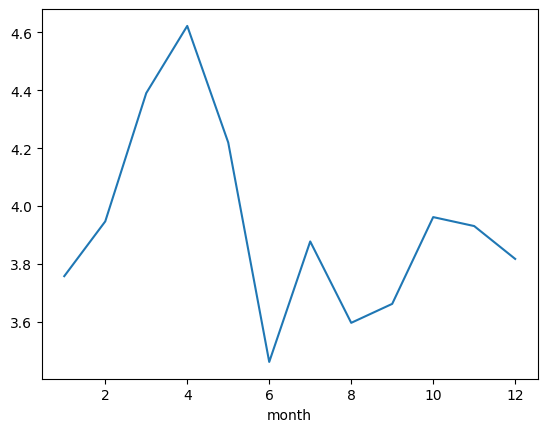

In [53]:
means = weather.groupby("month").mean()
means['평균풍속'].plot() # 판다스 내부에 멧플롯립 함수가 내장되어있음
plt.show()

논리 인덱싱 사용

In [56]:
weather[weather['최대풍속'] >= 25]

,일시,평균기온,최대풍속,평균풍속,month
1850,2015-08-25,20.1,25.3,14.9,8
2988,2018-10-06,19.4,26.0,7.0,10
3340,2019-09-23,15.0,25.8,11.0,9


데이터프레임 정렬

In [57]:
dic = {
    "name" : ['이길동', '김길동', '홍길동', '박길동'],
    'class' : ['A', 'A', "B", 'B'],
    'score' : [80, 90, 85, 75]
}

df = pd.DataFrame(dic, columns = ["name", "score", "class"])
print(df)
df.sort_values(['class', 'score'], inplace = True)
print(df)

  name  score class
0  이길동     80     A
1  김길동     90     A
2  홍길동     85     B
3  박길동     75     B
  name  score class
0  이길동     80     A
1  김길동     90     A
3  박길동     75     B
2  홍길동     85     B


In [59]:
weather = pd.read_csv(URL, encoding = "cp949")
(weather.sort_values(['평균기온'], inplace = False))

,일시,평균기온,최대풍속,평균풍속
2733,2018-01-24,-9.0,6.0,2.7
550,2012-02-02,-7.2,9.6,3.8
2002,2016-01-24,-6.8,11.5,5.8
182,2011-01-30,-6.2,4.7,1.9
2745,2018-02-05,-5.7,9.7,5.4
...,...,...,...,...
2925,2018-08-04,30.3,5.8,3.0
2913,2018-07-23,30.5,6.5,1.6
1105,2013-08-10,30.6,7.4,3.8
1104,2013-08-09,30.6,9.9,6.4


피봇테이블
 * df.pivot(index, columns, values)

In [61]:
dic = {
    'item' : ['ring0', 'ring0', 'ring1', 'ring1'],
    'type' : ['Gold', 'Silver', 'Gold', 'Bronze'],
    'price' : [2e4, 1e4, 5e4, 3e4]
}
df1 = pd.DataFrame(dic)
df2 = df1.pivot(index = "item", columns = "type", values = "price")
print(df2)

type    Bronze     Gold   Silver
item                            
ring0      NaN  20000.0  10000.0
ring1  30000.0  50000.0      NaN
